In [2]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from subprocess import call
sys.path.append('../')
from package_global_functions import *
latexFont(titlesize=11, ticklabelssize=11, labelsize=13, legendsize=12)

In [1]:
def cross_in_func(pop,*kwargs):
    # kwargs 
    # first: linear, sigmoid 1 or 2...
    # second: x0
    # third: a
    # fouth: make superior part of the sigmoid linear (True) or not
    if not kwargs or kwargs[0] == 0 or kwargs[0] == 'lin':
        return pop
    elif kwargs[0] == 1 or kwargs[0] == 'sigmoid1':
        x0, a = kwargs[1], kwargs[2]
        cival = 1/(1+np.exp(-a*(pop-x0))) 
        if len(kwargs) == 4 and kwargs[3]:
            cival = min(cival, pop)
        return cival
    elif kwargs[0] == 2 or kwargs[0] == 'sigmoid2':
        x0, a = kwargs[1], kwargs[2]
        return pop/(1+np.exp(-a*(pop-x0)))

## Sigmoid functions sample

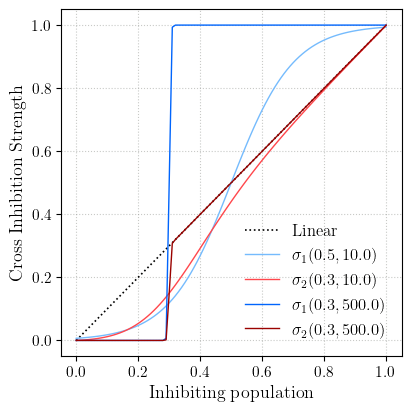

In [14]:
# plot the sigmoid functions used:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(ylabel='Cross Inhibition Strength', xlabel='Inhibiting population')
ax.grid(color='xkcd:gray', ls=':', alpha=0.5)
xs = np.arange(0.0, 1.01, 0.01)

ci_kwargs_list = [(0,), (1, 0.5, 10.0), (2, 0.3, 10.0), (1, 0.3, 500.0), (2, 0.3, 500.0)]
color_seq = ['k', 'xkcd:sky blue', 'xkcd:light red', 'xkcd:bright blue', 'xkcd:deep red']

ci_kwargs_labels = []
for ci_kwargs in ci_kwargs_list:
    if len(ci_kwargs) == 1:
        ci_kwargs_labels.append("Linear")
    elif len(ci_kwargs) == 4 and int(ci_kwargs[3]) == 1:
        ci_kwargs_labels.append(fr"$\sigma_{ci_kwargs[0]}^{{lin}} ({ci_kwargs[1]}, {ci_kwargs[2]})$")
    else:
        ci_kwargs_labels.append(fr"$\sigma_{ci_kwargs[0]} ({ci_kwargs[1]}, {ci_kwargs[2]})$")

for ci_kwargs,c,label in zip(ci_kwargs_list,color_seq,ci_kwargs_labels):
    civals = cross_in_func(xs, *ci_kwargs)
    lw=1.2 if ci_kwargs == (0,) else 1.0
    ls=':' if ci_kwargs == (0,) else '-'
    ax.plot(xs, civals, color=c, label=label, lw=lw, ls=ls)

fig.legend(loc=(0.58,0.16), frameon=False)
fig.savefig('cimods_sample.pdf')

## Bifurcations as a function of lambda

In [83]:
pis, qs = [0.1, 0.1], [9.0, 10.0]

# Generic lambdas
ls = np.arange(0.0, 1.0, 0.04)
# ls = np.arange(0.0,0.9,0.1)
ci_kwargs = [0, ]

# ci_kwargs = [1, 0.5, 10.0]
# ci_kwargs = [2, 0.3, 10.0]
ci_kwargs = [1, 0.3, 500.0]
# ci_kwargs = [2, 0.3, 500.0]

# OTHER LAMBDAS
if ci_kwargs == [0,]:
    # linear cross-inhibition, qs 9 10, pis 0.1 0.1...
    ls1 = np.arange(0.0, 0.24, 0.04)
    ls2 = np.arange(0.28, 1.0, 0.04)
    ls_close = np.array([0.18, 0.22, 0.23, 0.25]) # ac
    ls = np.concatenate([ls1, ls_close, ls2])
    ls = np.sort(ls)
elif ci_kwargs == [1, 0.3, 500.0]:
    # Non linear cross inhibition, qs 9 10, pis 0.1 0.1...
    ls = np.arange(0.0, 1.0, 0.04)
else:
    ls = np.arange(0.0, 1.0, 0.04)

pichainExec = ','.join([str(pi) for pi in pis]) 
qchainExec = ','.join([str(q) for q in qs])
ci_kwargs_chainExec = ','.join([str(cikw) for cikw in ci_kwargs])

sols = {'lower':[[],[],[]], 'mid':[[],[],[]], 'upper':[[],[],[]]}
for l in ls:
    call(f'python model_sols.py -pis {pichainExec} -qs {qchainExec} -l {l} -lci 1.0 -ci_kwargs {ci_kwargs_chainExec} > sols.dat', shell=True)
    solsdf = pd.read_csv(f'sols.dat', names=['f0', 'f1', 'f2'], header=None, sep='\s+')
    solsdf = solsdf.sort_values(by=['f2'])
    print(l, len(solsdf))
    if len(solsdf) == 3:
        iterKeys = enumerate(sols.keys())
    elif len(solsdf) == 1:
        iterKeys = enumerate(['upper', ])
    for i,k in iterKeys:
        for j in range(3):
            sols[k][j].append(solsdf[f'f{j}'].iloc[i])
    

0.0 3
0.04 4
0.08 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.12 3
0.16 4
0.2 3
0.24 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.28 3
0.32 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.36 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.4 3
0.44 3
0.48 3
0.52 4


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.56 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.6 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


0.64 3
0.68 3
0.72 3
0.76 3
0.8 3
0.84 3
0.88 3
0.92 3
0.96 3


/Users/david/Desktop/Uni_code/TFM_code/cross_inhibition/model_sols.py:16: RuntimeWarning: overflow encountered in exp
  cival = 1/(1+np.exp(-a*(pop-x0)))


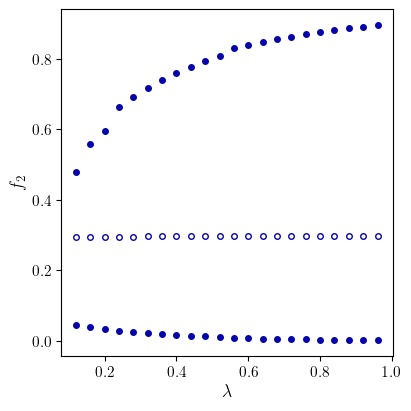

In [82]:
fig, ax = plt.subplots(1,1, figsize=(4,4), constrained_layout=True)
ax.set(xlabel=f'$\lambda$', ylabel=f'$f_2$')

for sol_id,fs in sols.items():
    color = 'xkcd:royal blue'
    mfc = 'w' if sol_id == 'mid' else color
    ax.plot(ls[len(ls)-len(fs[2]):], fs[2], marker='o', ms=4, lw=0, mfc=mfc, color=color)

pichain = '_'.join([str(pi) for pi in pis]) 
qchain = '_'.join([str(q) for q in qs])
ci_kwargs_chain = '_'.join([str(cikw) for cikw in ci_kwargs])
fig.savefig(f'f2evo_lambda_pis_{pichain}_qs_{qchain}_lci_1.0_ci_kwargs_{ci_kwargs_chain}.pdf')

In [61]:
len(ls)

24

In [62]:
len(sols['upper'][2])

16

In [56]:
sols['upper'][2]

[0.5175679289530756,
 0.5572124521178037,
 0.5956686238857776,
 0.6315698195320516,
 0.6641401019908226,
 0.6931449774961709,
 0.718711603881894,
 0.7411523632763055,
 0.7608439786405368,
 0.7781605090950706,
 0.7934426111283512,
 0.806987191990657,
 0.819047145068702,
 0.8634322762809566,
 0.8700262400807036,
 0.8760707466934096]

In [52]:
ls

array([0.  , 0.04, 0.08, 0.12, 0.16, 0.2 , 0.24, 0.28, 0.32, 0.36, 0.4 ,
       0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 , 0.84,
       0.88, 0.92, 0.96])

In [54]:
sols['mid'][2]

[0.2936385511892908,
 0.2941223783038181,
 0.294521246099472,
 0.2948615551159651,
 0.2951591041489526,
 0.2954240950967441,
 0.2956634964733344,
 0.2958822785708012,
 0.2960841107097681,
 0.2962717787789539,
 0.2964474480685805,
 0.2966128350485535,
 0.2967693237648419,
 0.2974519650390132,
 0.2975733364496953,
 0.2976908250692863]